In [1]:
'''
The PSID data (csv, rda) provides various variables from the Panel Study of Income Dynamics 1982. 
Such variables are commonly used to estimate so-called wage equations that quantify the effect 
of various determinants on a worker’s wage. In this data the monthly income from wages in 
US-Dollars (wage) is provided.
'''

'\nThe PSID data (csv, rda) provides various variables from the Panel Study of Income Dynamics 1982. \nSuch variables are commonly used to estimate so-called wage equations that quantify the effect \nof various determinants on a worker’s wage. In this data the monthly income from wages in \nUS-Dollars (wage) is provided.\n'

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
df = pd.read_csv("PSID1982.csv")
df.head()

,wage,experience,education,gender,occupation,union
0,515,9,9,male,white,no
1,912,36,11,male,blue,no
2,954,12,12,male,blue,yes
3,1474,16,16,male,white,no
4,1539,32,12,male,blue,no


* Plot wage. Why may a log-transformation of wage, i.e., log(wage), be more suitable for fitting a linear regression model

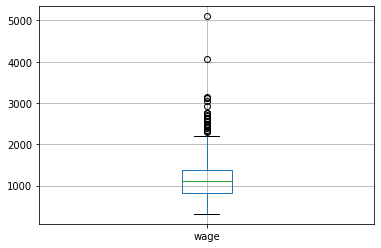

In [4]:
df.boxplot(column='wage')
plt.show()

In [5]:
m = smf.ols("np.log(wage) ~ gender + union + education + experience", data=df).fit()

[Text(0.5, 1.0, 'Normal Q-Q'),
 Text(0.5, 0, 'Theoretical Quantiles'),
 Text(0, 0.5, 'Standardized Residuals')]

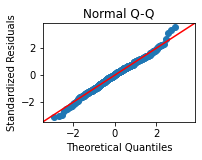

In [6]:
# Normal Q-Q plot
from statsmodels.graphics.gofplots import ProbPlot
norm_residuals = m.get_influence().resid_studentized_internal
fig = plt.figure()
ax = fig.add_subplot(2, 2, 2)
QQ = ProbPlot(norm_residuals)
QQ.qqplot(line='45', ax=ax)
ax.set(title="Normal Q-Q", xlabel="Theoretical Quantiles", ylabel="Standardized Residuals")

[Text(0.5, 1.0, 'Normal Q-Q'),
 Text(0.5, 0, 'Theoretical Quantiles'),
 Text(0, 0.5, 'Standardized Residuals')]

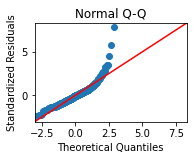

In [7]:
m_2 = smf.ols("wage ~ gender + union + education + experience", data=df).fit()
norm_residuals = m_2.get_influence().resid_studentized_internal
fig = plt.figure()
ax = fig.add_subplot(2, 2, 2)
QQ = ProbPlot(norm_residuals)
QQ.qqplot(line='45', ax=ax)
ax.set(title="Normal Q-Q", xlabel="Theoretical Quantiles", ylabel="Standardized Residuals")

> When looking at the "QQ-Plot", we can see that for the model with log, the residuals are more normally distributed compared to the model without the log of wage. 
The closer the dots are to the line, the more it fulfills the assumption of a normal distribution. At the end there will always be some deviations, but if they are as minor as here, we can conclude, that the residuals are normally distributed. 


> Log-transformation would be more suitable for fitting linear regression model because in this column there are many outliners (as we can see on boxplot). Log transformation de-emphasizes outliers and allows us to potentially obtain a bell-shaped distribution. The idea is that taking the log of the data can restore symmetry to the data.

* Estimate a linear regression model (via OLS) for log(wage) with gender (male/female), union membership (yes/no), education (in years), and work experience (in years) as explanatory variables. For *work experience* include both a linear and a quadratic effect.

In [8]:
model = smf.ols("np.log(wage) ~ gender + union + education + experience + np.power(experience, 2)", data=df)
m = model.fit()

print(m.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     58.25
Date:                Thu, 27 Jan 2022   Prob (F-statistic):           1.46e-48
Time:                        08:10:20   Log-Likelihood:                -194.29
No. Observations:                 552   AIC:                             400.6
Df Residuals:                     546   BIC:                             426.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

> If the sex is male and the variable gender increases by one unit, the log(wage) increases by 0.4078 units. \
If you are a member of a union and this variable increases by one unit, the log(wage) increases by 0.0855 units. \
When education increases by one unit, the log(wage) increases by 0.0855 units. \
When experience increases by one unit, the log(wage) increases by 0.0282 units. \
When the experience^2 increases by one unit, the log(wage) decreases by 0.0004 units.

> low p-value (< 0.05) indicates that we can reject the null hypothesis. In other words, all predictors has a low p-value and is likely to be a meaningful addition to the model because changes in the predictor's value are related to changes in the response variable.

> R^2 statistic shows that 35% of the variability in the outcome data cannot be explained by the mode

> df = 5, so it is not a complex model

> High F-value shows us that we can reject the null hypothesis <br>
Conclusion: the predictors' values are related to changes in the response (wage) variable. So we reject the Null hypothesis (that there is no relationships between these variables)

* Perform a stepwise model selection in which you consider as upper limit the model with both 2-way interactions of gender with education as well as union with education

In [9]:
df['wage'] = np.log(df['wage'])
df['experience_2'] = np.power(df['experience'], 2)
# i applied log functions to the variables because other way it won't work

In [10]:
from stepwise_selection import stepwise_selection
model_log = smf.ols("wage ~ gender + union + education + experience + experience_2", data=df)
mod = stepwise_selection(model_log, scope={"lower": "wage ~ 1",
                                           "upper": "wage ~ (education * gender + education * union + experience + experience_2)**2" })

Step:  aic= 400.5748441454323
(' + education:union', 369.5850380368688)
(' + gender:education:union', 372.2043266786511)
(' + education:union:experience', 396.88352360823615)
(' + experience:experience_2', 398.50915180292714)
('', 400.5748441454323)
(' + education:gender', 401.15221528767324)
(' + education:experience_2', 401.40923423083314)
(' + union:experience_2', 401.6656726797828)
(' + education:experience', 401.75595316025124)
(' + education:union:experience_2', 402.22928099387104)
(' + union:experience', 402.29111923351593)
(' + gender:experience', 402.3569072361622)
(' + gender:experience_2', 402.5043357305899)
(' + gender:union', 402.56115195334314)
(' + education:gender:experience_2', 403.40484135221595)
(' + education:gender:experience', 403.7553153724821)
(' - union', 405.6228312065655)
(' - experience_2', 407.3040322892009)
(' - experience', 413.7668969374688)
(' - gender', 459.27348405950056)
(' - education', 571.3500537849675)
Step:  aic= 369.5850380368688
('', 369.58503

> So the best model will be log(wage) ~ gender + union + education + experience + experience_2 + union:education \
Lower AIC scores are better, and AIC penalizes models that use more parameters.

> In the first model AIC decreases when adding the interaction effect between education and union as well as interaction between gender, union and education. Adding the interaction effect brings us lower AIC, therefore we do that. 
In the next step, our model can't be improved by adding or dropping something. \
In the final model wage depends on education, gender, union, experience, experience**2 and the interaction effect between education and union. 


* Describe the influence of education on wage in the selected model

In [11]:
mod_fit = mod.fit()
print(mod_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     57.03
Date:                Thu, 27 Jan 2022   Prob (F-statistic):           1.22e-54
Time:                        08:10:21   Log-Likelihood:                -177.79
No. Observations:                 552   AIC:                             369.6
Df Residuals:                     545   BIC:                             399.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

> The *education* variable influences on *wage* alone and with a combination with a variable *union*. According to the table both of this interacions have an impact because p-value less than 0.05. \
Education in the interaction effect with union helps to reduce the AIC and reach the selected model.  

> Influence of education on wage in the selected model:
Education itself has a positive influence on wage in the selected model, because it decreases the AIC and furthermore, education in the interaction effect with union helps to reduce the AIC and reach the selected model.  


* Calculate the specific regression equations according to the final model with log(wage) as a function of education for given values of gender, union, and experience. Consider the following four groups: male/union, female/union, male/without union, female/without union and each with average work experience.

> male/union

log(wage) ~ (intercept) + gender + union + education + experience + experience_2 + union:education \
log(wage) = 4.9 + 0.39 * 1 + 0.93 * 1 + 0.1 * education - 0.07 * education + 0.0299 - 0.005 \
log(wage) = 6.24 - 0.03 * education

> female/union

log(wage) ~ (intercept) + gender + union + education + experience + experience_2 + union:education \
log(wage) = 4.9 + 0.39 * 0 + 0.93 * 1 + 0.1 * education - 0.7 * education + 0.0299 - 0.005 \
log(wage) = 5.85 - 0.03 * education

> male/without union

log(wage) ~ (intercept) + gender + union + education + experience + experience_2 + union:education \
log(wage) = 4.9 + 0.39 * 1 + 0.93 * 0 + 0.1 * education - 0.7 * education + 0.0299 - 0.005 \
log(wage) = 5.31 - 0.03 * education

>female/without union

log(wage) ~ (intercept) + gender + union + education + experience + experience_2 + union:education \
log(wage) = 4.9 + 0.39 * 0 + 0.93 * 0 + 0.1 * education - 0.7 * education + 0.0299 - 0.005 \
log(wage) = 4.92 - 0.03 * education